In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import numpy as np


<video style="width: auto; height: 600px" 
       src="../resources/shooting_vid.mp4"  
       controls>
</video>

<img style="width: auto; height: 600px"
       src="../resources/arm1.jpg"  
       controls>
</img>
<img  style="width: auto; height: 600px"
       src="../resources/arm2.jpg"  
       controls>
</img>

In [56]:
file_path = '../dane/data_collection_20231202114746.csv' # ostatni strzał zerwany
df = pd.read_csv(file_path)

print(df.head())


   Index   V1   V2  Noise
0      0  337  282    313
1      1  345  278    290
2      2  354  279    283
3      3  365  295    291
4      4  377  313    303


Pokaz dla próbki, w której piąty strzał jest zerwany

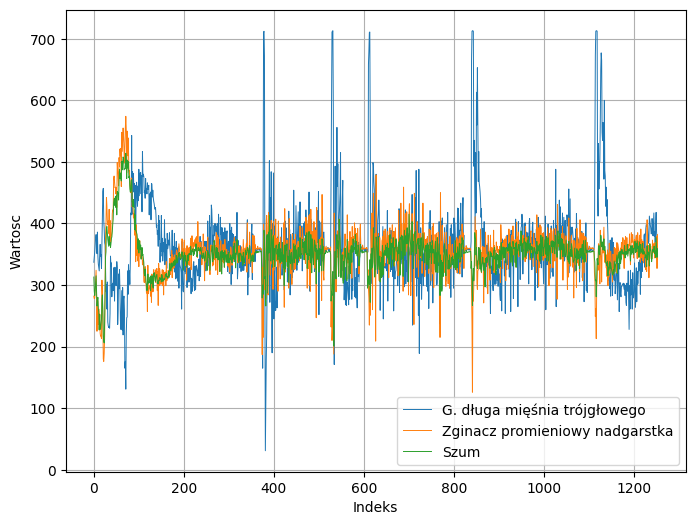

In [57]:
plt.figure(figsize=(8, 6))  

plt.plot(df['Index'], df['V1'], label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.plot(df['Index'], df['V2'], label='Zginacz promieniowy nadgarstka', linewidth=0.7)
plt.plot(df['Index'], df['Noise'], label='Szum', linewidth=0.7)

plt.xlabel('Indeks')
plt.ylabel('Wartosc')

plt.legend() 
plt.grid()  
plt.show()


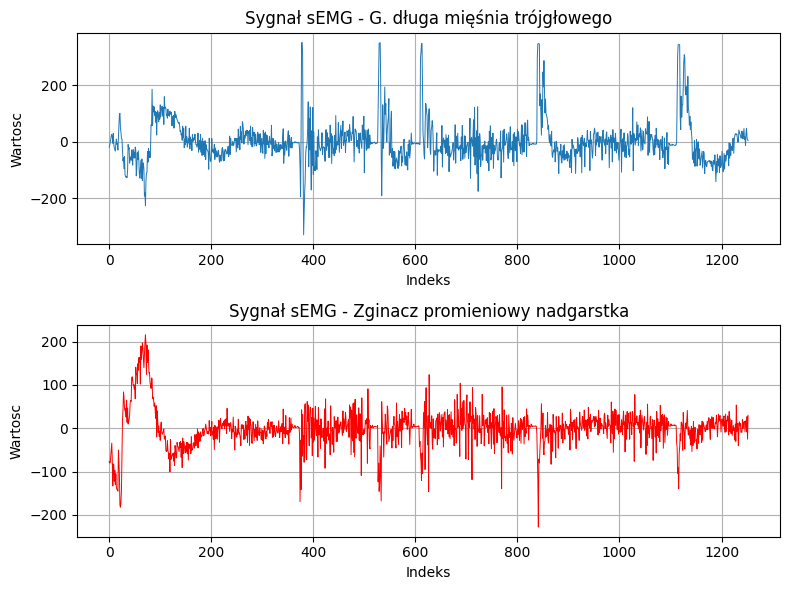

In [58]:
triceps = signal.detrend(df['V1'])
flexor = signal.detrend(df['V2'])

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Index'], triceps , label='G. długa mięśnia trójgłowego', linewidth=0.7)
plt.xlabel('Indeks')
plt.ylabel('Wartosc')
plt.title('Sygnał sEMG - G. długa mięśnia trójgłowego')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df['Index'], flexor , label='Zginacz promieniowy nadgarstka', linewidth=0.7, color='red')
plt.xlabel('Indeks')
plt.ylabel('Wartosc')
plt.title('Sygnał sEMG - Zginacz promieniowy nadgarstka')
plt.grid()

plt.tight_layout()
plt.show()

In [59]:
window_size = 3  # Define the size of the moving window
rms_values = []

for i in range(len(triceps) - window_size + 1):
    window = triceps[i:i + window_size]
    rms = np.sqrt(np.mean(window**2))
    rms_values.append(rms)



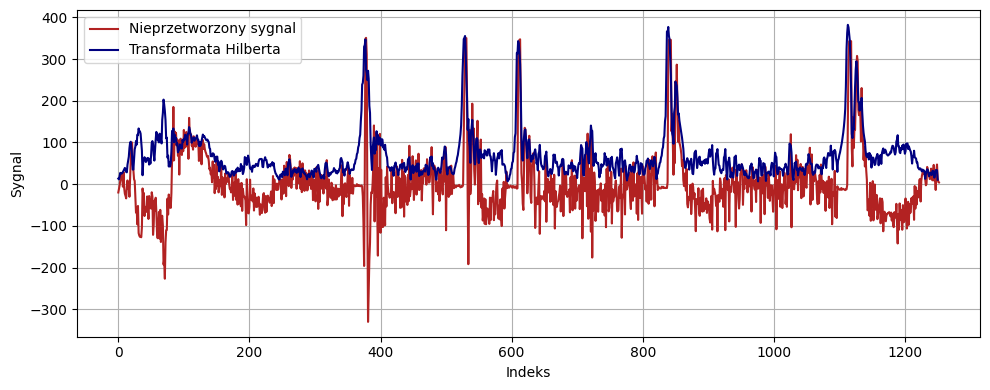

In [60]:
plt.figure(figsize=(10, 4))

plt.plot(triceps,color='firebrick',label='Nieprzetworzony sygnal')
plt.xlabel('Indeks')
plt.ylabel('Sygnal')
plt.plot(np.abs(signal.hilbert(rms_values)),color='navy',lw=1.5,label='Transformata Hilberta')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
channel_1 = pd.Series(triceps)
channel_2 = pd.Series(flexor)

mean_channel_1 = channel_1.mean()
median_channel_1 = channel_1.median()
std_channel_1 = channel_1.std()

rms_channel_1 = np.sqrt(np.mean(np.square(channel_1)))

mean_channel_2 = channel_2.mean()
median_channel_2 = channel_2.median()
rms_channel_2 = np.sqrt(np.mean(np.square(channel_2)))

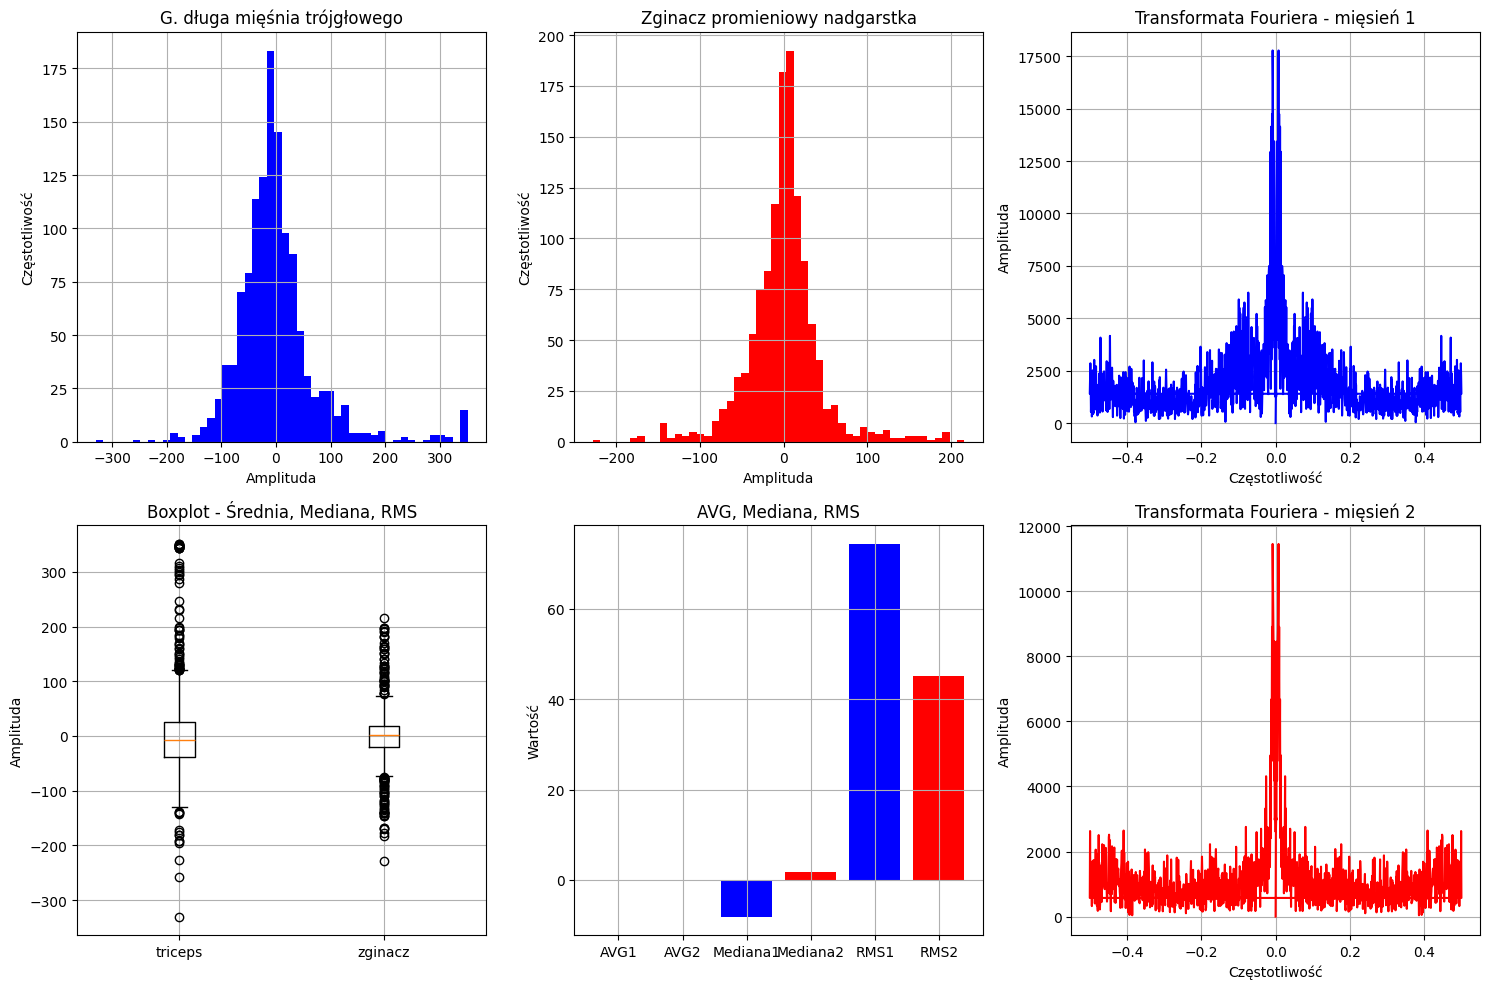

In [69]:

fft_channel_1 = np.fft.fft(channel_1)
fft_channel_2 = np.fft.fft(channel_2)
frequency_1 = np.fft.fftfreq(len(channel_1))
frequency_2 = np.fft.fftfreq(len(channel_2))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# histogramy
axes[0, 0].grid()
axes[0, 0].hist(channel_1, bins=50, color='blue')
axes[0, 0].set_title('G. długa mięśnia trójgłowego')
axes[0, 0].set_xlabel('Amplituda')
axes[0, 0].set_ylabel('Częstotliwość')


axes[0, 1].hist(channel_2, bins=50, color='red')
axes[0, 1].set_title('Zginacz promieniowy nadgarstka')
axes[0, 1].set_xlabel('Amplituda')
axes[0, 1].set_ylabel('Częstotliwość')
axes[0, 1].grid()

# boxploty
data = [channel_1, channel_2]
labels = ['triceps', 'zginacz']
axes[1, 0].boxplot(data, labels=labels)
axes[1, 0].set_title('Boxplot - Średnia, Mediana, RMS')
axes[1, 0].set_ylabel('Amplituda')
axes[1, 0].grid()

# słupkowe
statistics = [mean_channel_1, mean_channel_2, median_channel_1, median_channel_2, rms_channel_1, rms_channel_2]
labels = ['AVG1', 'AVG2', 'Mediana1', 'Mediana2', 'RMS1', 'RMS2']
axes[1, 1].bar(labels, statistics, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
axes[1, 1].set_title('AVG, Mediana, RMS')
axes[1, 1].set_ylabel('Wartość')
axes[1, 1].grid()

# Transformata Fouriera
axes[0, 2].plot(frequency_1, np.abs(fft_channel_1), color='blue')
axes[0, 2].set_title('Transformata Fouriera - mięsień 1')
axes[0, 2].set_xlabel('Częstotliwość')
axes[0, 2].set_ylabel('Amplituda')
axes[0, 2].grid()

axes[1, 2].plot(frequency_2, np.abs(fft_channel_2), color='red')
axes[1, 2].set_title('Transformata Fouriera - mięsień 2')
axes[1, 2].set_xlabel('Częstotliwość')
axes[1, 2].set_ylabel('Amplituda')
axes[1, 2].grid()

plt.tight_layout()

plt.show()

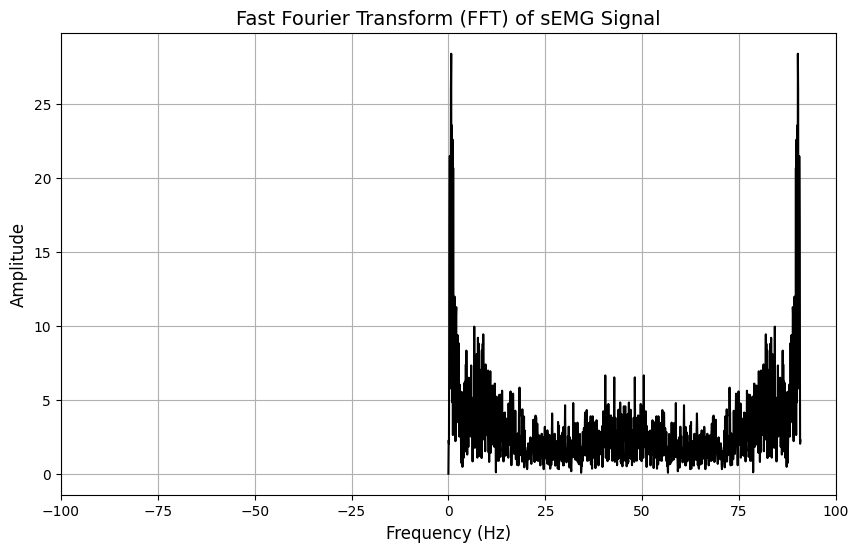

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Perform FFT on the signal
FFT = np.fft.fft(triceps)
N = len(FFT)

# Calculate the frequency resolution and frequency axis
sampling_rate = 1000 / 11  # Sampling rate of the signal
freq_resolution = sampling_rate / N
freq_axis = np.linspace(0, (N - 1) * freq_resolution, N)

# Plotting the FFT
plt.figure(figsize=(10, 6))
plt.plot(freq_axis[:N // 2], 2 * np.abs(FFT[:N // 2]) / N, color='black')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Fast Fourier Transform (FFT) of sEMG Signal', fontsize=14)
plt.grid(True)
plt.xlim(-100, 100)  # Set the x-axis limit for better visualization
plt.show()


In [14]:
from pydub import AudioSegment
from pydub.playback import play
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display, clear_output

file_path = '../audio/212-1208-7.aac'
audio = AudioSegment.from_file(file_path, format="aac")

<audio controls>
  <source src="../audio/212-1208-7.mp3" type="audio/mp4">
Your browser does not support the audio element.
</audio>

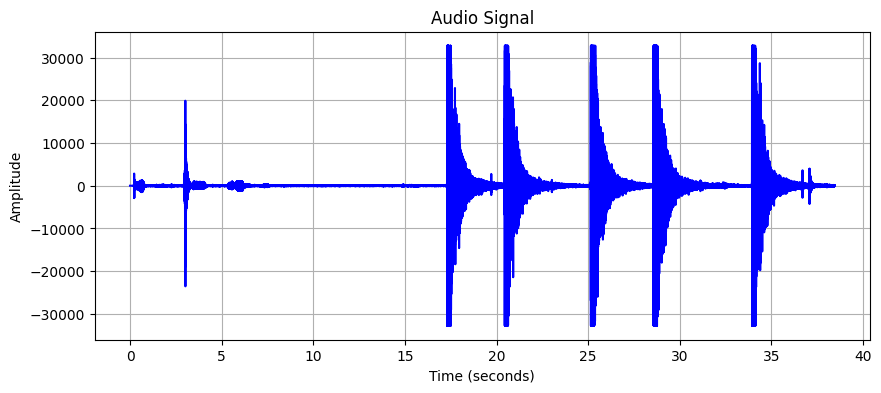

In [15]:
audio_data = np.array(audio.get_array_of_samples())

duration = len(audio_data) / audio.frame_rate
time = np.linspace(0, duration, len(audio_data))

plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.grid(True)
plt.show()
